In [1]:
import os
import sys
import glob
import time
import argparse

import numpy as np
from matplotlib import pyplot as plt

In [103]:
address_list = ['ae_label', 'ae_baseline']

results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz','stats_finecd_epochtest.npz']

#    logs_list = ['logs_aebatch10_0', 'logs_aebatch10_1', 'logs_aebatch10_2', 'logs_aebatch128_0'] #'logs',logs_adam_0 logs_adam_1
logs_list = {'ae_label':'logs', 'ae_baseline':'logs_aebatch128_0'}

print(logs_list)

{'ae_label': 'logs', 'ae_baseline': 'logs_aebatch128_0'}


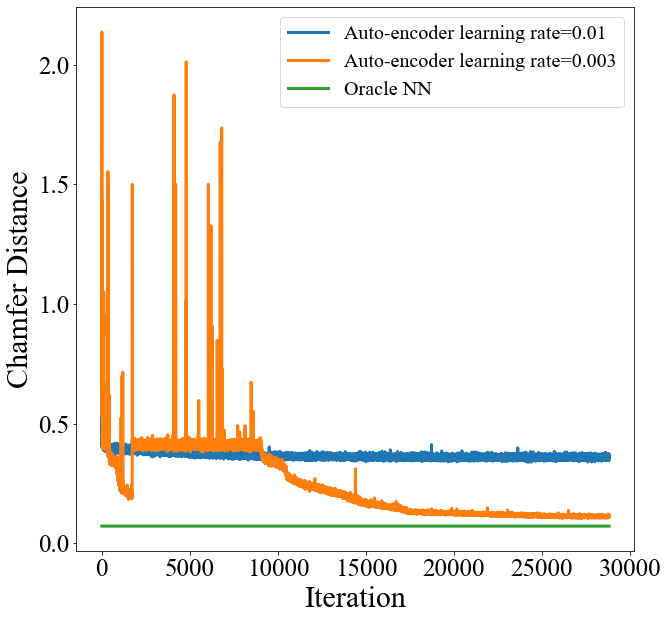

In [104]:
fig = plt.figure(figsize=(10,10))
for row, add in enumerate(address_list):
    log = logs_list[add]
    result = results_list[1]
    file = os.path.join(add, '{}/{}'.format(log,result))
    stats = np.load(file)
    value_list = []
    for value in stats["iter_loss"][:,1]:
        if value > 2.2:
            value_list.append(1.5)
        else:
            value_list.append(value)
    if row == 0:
        label = 'Auto-encoder' + ' learning rate=0.01'
    else:
        label = 'Auto-encoder' + ' learning rate=0.003'
    plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
    plt.tick_params(labelsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Iteration',size=30)
    plt.ylabel('Chamfer Distance',size=30)
    plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
#plt.show()
#plt.savefig('../../figs/model/ae_trainingloss.png')

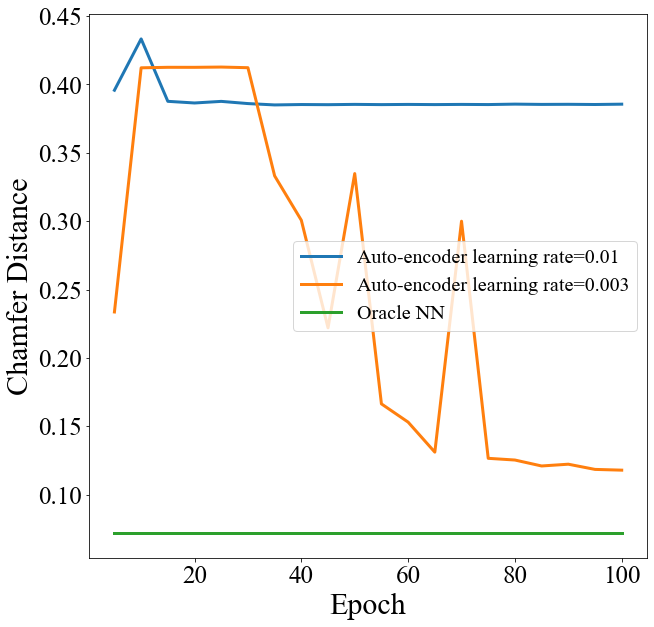

In [105]:
fig = plt.figure(figsize=(10,10))
for row, add in enumerate(address_list):
    log = logs_list[add]
    result = results_list[2]
    file = os.path.join(add, '{}/{}'.format(log,result))
    stats = np.load(file)
    value_list = []
    for value in stats["iter_loss"][:,1]:
        if value > 0.7:
            value_list.append(0.3)
        else:
            value_list.append(value)
    if row == 0:
        label = 'Auto-encoder' + ' learning rate=0.01'
    else:
        label = 'Auto-encoder' + ' learning rate=0.003'
    plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
    plt.tick_params(labelsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Epoch',size=30)
    plt.ylabel('Chamfer Distance',size=30)
    plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../../figs/model/ae_testloss.png')

In [106]:
address_list = ['ae_label','ae_label5', 'ae_resnet', 'ae_baseline',]
address_list = address_list[1:4]
results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz', 'stats_finecd_epochtest.npz']

#logs_list = ['logs_aebatch10_0', 'logs_aebatch10_1', 'logs_aebatch10_2', 'logs_aebatch128_0'] #'logs',logs_adam_0 logs_adam_1
logs_list = {'ae_label':'logs', 'ae_baseline':'logs_aebatch128_0',
            'ae_resnet':'logs_resnet_nolabel_twofold', 'ae_label5':'logs_label5ae_0'}

print(address_list)

['ae_label5', 'ae_resnet', 'ae_baseline']


ae_label5
ae_resnet
ae_baseline


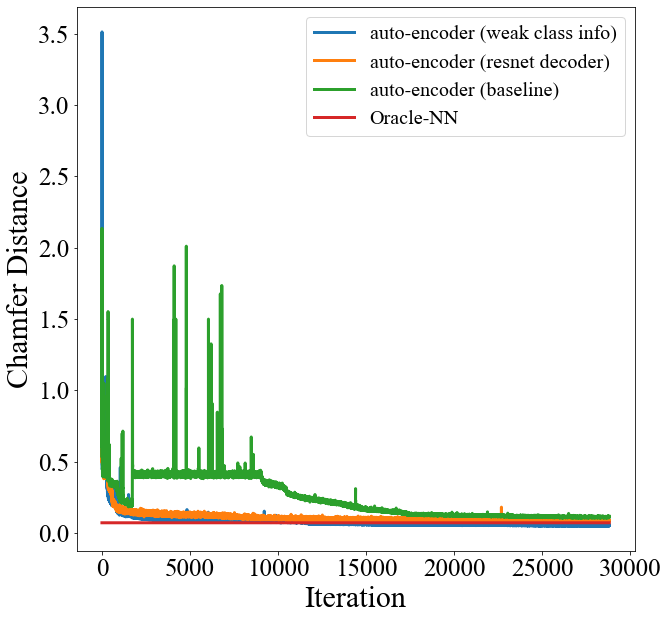

In [107]:
fig = plt.figure(figsize=(10,10))
max_iter = None
for row, add in enumerate(address_list):
    log = logs_list[add]
    result = results_list[1]
    file = os.path.join(add, '{}/{}'.format(log,result))
    stats = np.load(file)
    value_list = []
    print(add)
    if add == 'ae_label5':
        label = 'auto-encoder (weak class info)'
        plt.plot(stats["iter_loss"][:,0], stats["iter_loss"][:,1],'-', linewidth ='3', label = '{}'.format(label))
        max_iter = stats["iter_loss"][:,0]
    elif add == 'ae_baseline':
        label = 'auto-encoder (baseline)'
        for value in stats["iter_loss"][:,1]:
            if value > 2.2:
                value_list.append(1.5)
            else:
                value_list.append(value)
        plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
    elif add == 'ae_resnet':
        label = 'auto-encoder (resnet decoder)'
        plt.plot(max_iter, stats["iter_loss"][:len(max_iter),1],'-', linewidth ='3', label = '{}'.format(label))
    plt.tick_params(labelsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Iteration',size=30)
    plt.ylabel('Chamfer Distance',size=30)
    plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle-NN'))
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../../figs/model/ae_optimal_trainloss.png')

In [100]:
address_list = ['ae_label','ae_label5', 'ae_resnet', 'ae_baseline',]
address_list = address_list[1:4]
results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz', 'stats_finecd_epochtest.npz']

#logs_list = ['logs_aebatch10_0', 'logs_aebatch10_1', 'logs_aebatch10_2', 'logs_aebatch128_0'] #'logs',logs_adam_0 logs_adam_1
logs_list = {'ae_label':'logs', 'ae_baseline':'logs_aebatch128_0',
            'ae_resnet':'logs_resnet_nolabel_twofold', 'ae_label5':'logs_label5ae_0'}

print(address_list)

['ae_label5', 'ae_resnet', 'ae_baseline']


ae_label5
ae_resnet
ae_baseline


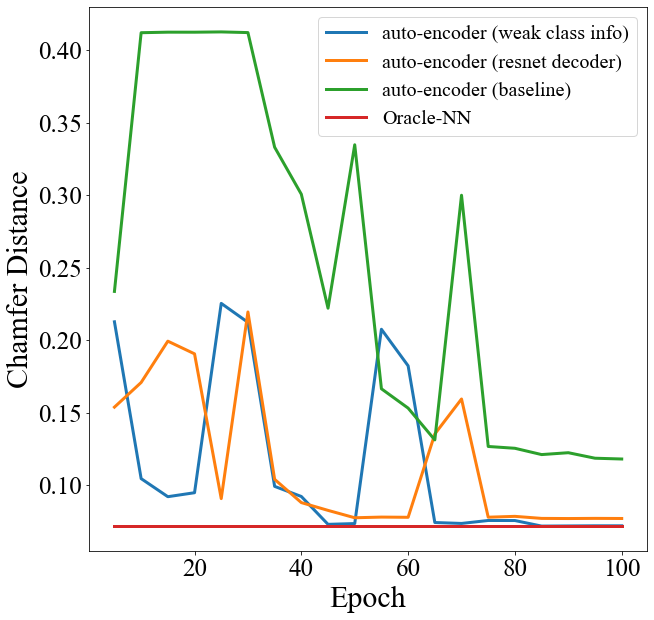

In [108]:
fig = plt.figure(figsize=(10,10))
for row, add in enumerate(address_list):
    log = logs_list[add]
    result = results_list[2]
    file = os.path.join(add, '{}/{}'.format(log,result))
    stats = np.load(file)
    value_list = []
    print(add)
    if add == 'ae_label5':
        label = 'auto-encoder (weak class info)'
        plt.plot(stats["iter_loss"][:,0], stats["iter_loss"][:,1],'-', linewidth ='3', label = '{}'.format(label))
    elif add == 'ae_baseline':
        label = 'auto-encoder (baseline)'
        for value in stats["iter_loss"][:,1]:
            if value > 0.7:
                value_list.append(0.3)
            else:
                value_list.append(value)
        plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
    elif add == 'ae_resnet':
        label = 'auto-encoder (resnet decoder)'
        plt.plot(stats["iter_loss"][:,0], stats["iter_loss"][:,1],'-', linewidth ='3', label = '{}'.format(label))
    
    plt.tick_params(labelsize=25)
    plt.legend(fontsize=20)
    plt.xlabel('Epoch',size=30)
    plt.ylabel('Chamfer Distance',size=30)
    plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle-NN'))
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../../figs/model/ae_optimal_testloss.png')

In [32]:
'''
address_0 = 'ae_label_baseline'

results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz']

#    logs_list = ['logs_aebatch10_0', 'logs_aebatch10_1', 'logs_aebatch10_2', 'logs_aebatch128_0'] #'logs',logs_adam_0 logs_adam_1
logs_list = {'logs', 'logs_adam_0'}
results_list = [results_list[1]]
print(logs_list)

fig = plt.figure(figsize=(10,10))
for row, log in enumerate(logs_list):
    for col, result in enumerate(results_list): 
        file = os.path.join(address_0, '{}/{}'.format(log,result))
        stats = np.load(file)
        value_list = []
        for value in stats["iter_loss"][:,1]:
            if value > 4:
                value_list.append(2.5)
            else:
                value_list.append(value)
        if row == 0:
            label = 'Auto-encoder' + ' learning rate=0.01'
        else:
            label = 'Auto-encoder' + ' learning rate=0.003'
        plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
        plt.tick_params(labelsize=25)
        plt.legend(fontsize=20)
        plt.xlabel('Iteration',size=30)
        plt.ylabel('Chamfer Distance',size=30)
        plt.rcParams["font.family"] = "Times New Roman"
        
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
plt.show()
#plt.savefig('../figs/model/ae_trainingloss.png') 

results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz']
results_list = [results_list[0]]

fig = plt.figure(figsize=(10,10))
for row, log in enumerate(logs_list):   
    for col, result in enumerate(results_list): 
        file = os.path.join(address_0, '{}/{}'.format(log,result))
        stats = np.load(file)
        if row == 0:
            label = 'Auto-encoder' + ' learning rate=0.01'
        else:
            label = 'Auto-encoder' + ' learning rate=0.003'
        plt.plot(stats["iter_loss"][:,0], stats["iter_loss"][:,1],'-', linewidth ='3',label = '{}'.format(label))
        plt.tick_params(labelsize=25)
        plt.legend(fontsize=20)
        plt.xlabel('Epoch',size=30)
        plt.ylabel('Chamfer Distance',size=30)
        plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719],linewidth ='3',label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
plt.show()
#plt.savefig('../figs/model/ae_testloss.png')
'''

'\naddress_0 = \'ae_label_baseline\'\n\nresults_list = [\'stats_finecd_epochval.npz\', \'stats_finecd_itertrain.npz\']\n\n#    logs_list = [\'logs_aebatch10_0\', \'logs_aebatch10_1\', \'logs_aebatch10_2\', \'logs_aebatch128_0\'] #\'logs\',logs_adam_0 logs_adam_1\nlogs_list = {\'logs\', \'logs_adam_0\'}\nresults_list = [results_list[1]]\nprint(logs_list)\n\nfig = plt.figure(figsize=(10,10))\nfor row, log in enumerate(logs_list):\n    for col, result in enumerate(results_list): \n        file = os.path.join(address_0, \'{}/{}\'.format(log,result))\n        stats = np.load(file)\n        value_list = []\n        for value in stats["iter_loss"][:,1]:\n            if value > 4:\n                value_list.append(2.5)\n            else:\n                value_list.append(value)\n        if row == 0:\n            label = \'Auto-encoder\' + \' learning rate=0.01\'\n        else:\n            label = \'Auto-encoder\' + \' learning rate=0.003\'\n        plt.plot(stats["iter_loss"][:,0], value_li